# Visualizing Models, Data, and Training with Tensorboard

在这个60秒的学习中，我们展示了怎么下载数据，喂给我们定义的nn.Module子类模型，训练模型，测试数据。为了来看发生了什么，我们可以在模型训练的时候打印一些统计数据。然而，我们可以做以下提高的方式：PyTorch与TensorBoard结合，一个专门用来可视化神经网络运行结果的工具。这份tutorial阐明了一些功能，使用Fashion-MNIST数据集，可以被PyTorch用torchvision.dataset来读取。

在这份tutorial中，我们会学习到以下内容：  
1.使用合适的transforms来读取数据(跟之前的tutorial相似)  
2.设置TensorBoard。  
3.写入TensorBoard。  
4.用TensorBoard查看模型结构。  
5.用TensorBoard来创建代码更少的交互版本的可视化过程。  

特别地，在第5点，我们会看见：    
1.一些方法来查看我们的训练数据。  
2.怎么样在训练的时候来跟踪我们的模型表现。  
3.怎么样在训练的时候评估我们的模型表现。  

我们接下来我们会使用CIFAR-10 tutorial一样的模版代码。


In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# datasets
trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

ImportError: dlopen(/Users/weigaojie/anaconda3/lib/python3.7/site-packages/torchvision/_C.cpython-37m-darwin.so, 2): Symbol not found: __ZN2at19NonVariableTypeMode10is_enabledEv
  Referenced from: /Users/weigaojie/anaconda3/lib/python3.7/site-packages/torchvision/_C.cpython-37m-darwin.so
  Expected in: flat namespace
 in /Users/weigaojie/anaconda3/lib/python3.7/site-packages/torchvision/_C.cpython-37m-darwin.so

我们会从这份tutorial中定义相同的模型结构，只是做很少的改变来解释图像现在是一个channel而不是3和28x28，更不是32x32的事实。

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

NameError: name 'nn' is not defined

我们会跟之前一样定义相同的optimizer和criterion:

In [3]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

NameError: name 'nn' is not defined

## 1. TensorBoard setup
现在我们设置TensorBoard，从torch.utils import tensorboard和定义SummaryWriter，我们关键的object是把信息写入TensorBoard。 

In [ ]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

单独这一行创建了runs/fashion_mnist_experiment_1这个文件夹。

## 2. Writing to TensorBoard
现在让我们把图像写进我们的TensorBoard，特别地，格子——用make_grid函数。

In [ ]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

现在运行：

In [ ]:
tensorboard --logdir=runs

从命令行中运行然后浏览https://localhost:6006 就可以看到下面的。
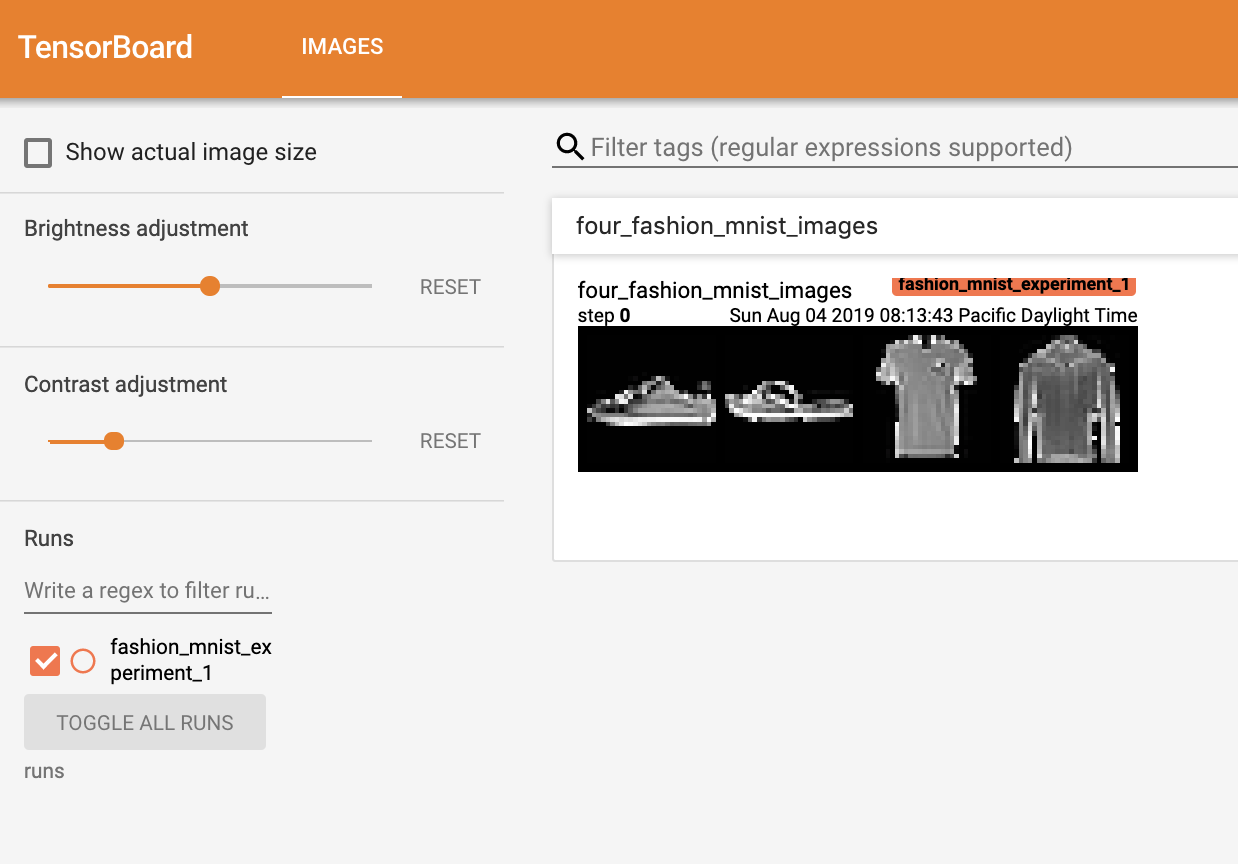
现在你知道怎么去使用TensorBoard来！这个例子，然而，可以在Jupyter Notebook上完成 - 哪里TensorBoard真的在创建交互可视化方面做得很出色。我们会在接下来接触到其中之一，以及在这份tutorial的结束前接触到其他几个。

## 3. Inspect the model using TensorBoard
TensorBoard的另一个长处是它可视化复杂模型结构的能力。让我们一起来可视化我们建造的模型。

In [ ]:
writer.add_graph(net, images)
writer.close()

现在在更新TensorBoard过程中，你应该看到“Graphs”的tab看起来像： 

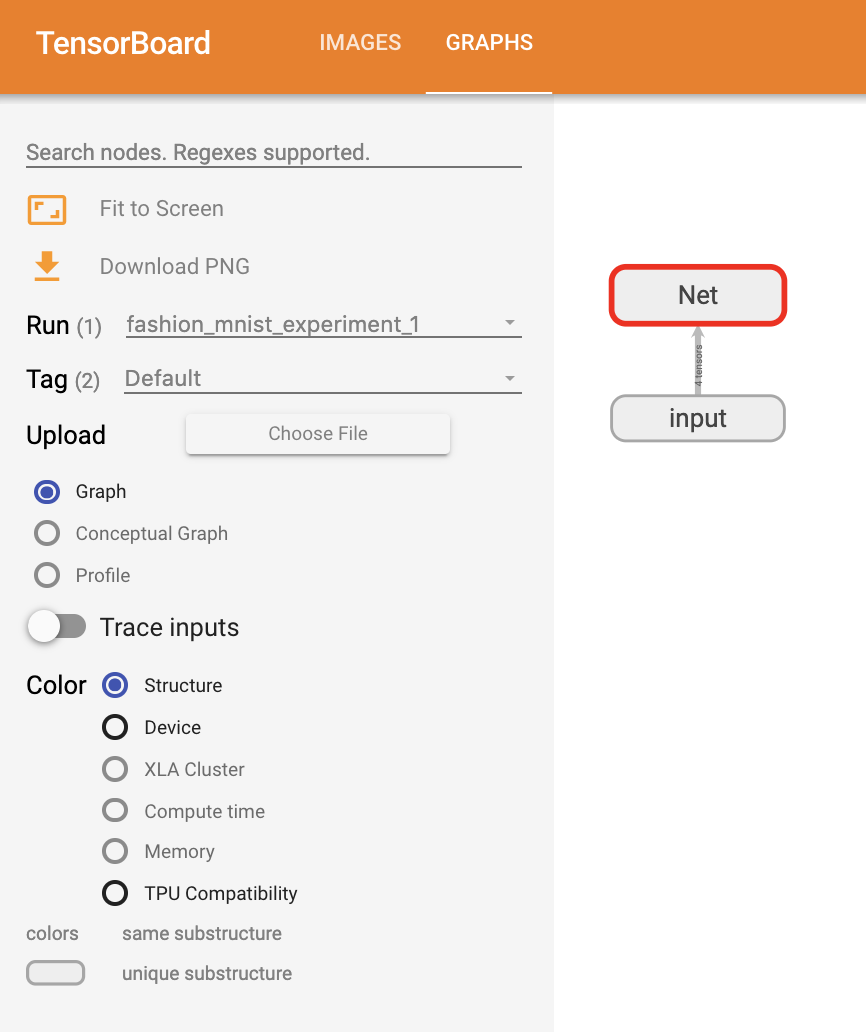 

直接去双击“Net”来看它扩展，详细看拼接出模型的独立操作。TensorBoard有非常方便的特性来为高维数据做可视化，例如图像数据的低维空间；我们会在接下来覆盖到这部分。

## 4. Adding a “Projector” to TensorBoard  

我们可以add_embedding方法把高维度数据转化为可视化低维度的表示。  

In [ ]:
# helper function
def select_n_random(data, labels, n=100):
    '''
    Selects n random datapoints and their corresponding labels from a dataset
    '''
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# select random images and their target indices
images, labels = select_n_random(trainset.data, trainset.targets)

# get the class labels for each image
class_labels = [classes[lab] for lab in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.close()

现在在TensorBoard的“Projector”的tab键里，你可以看到这100张图，每一张都是784维度的，投射到3维的空间。更加地，这是交互的：你可以click和拉拽到三维的旋转空间投射中。最后，一些tips来使得你的可视化更简单：选择“color: label”在最左边，同时启动“night mode”，这会让图像更容易被看到，因为它的背景是白色的：

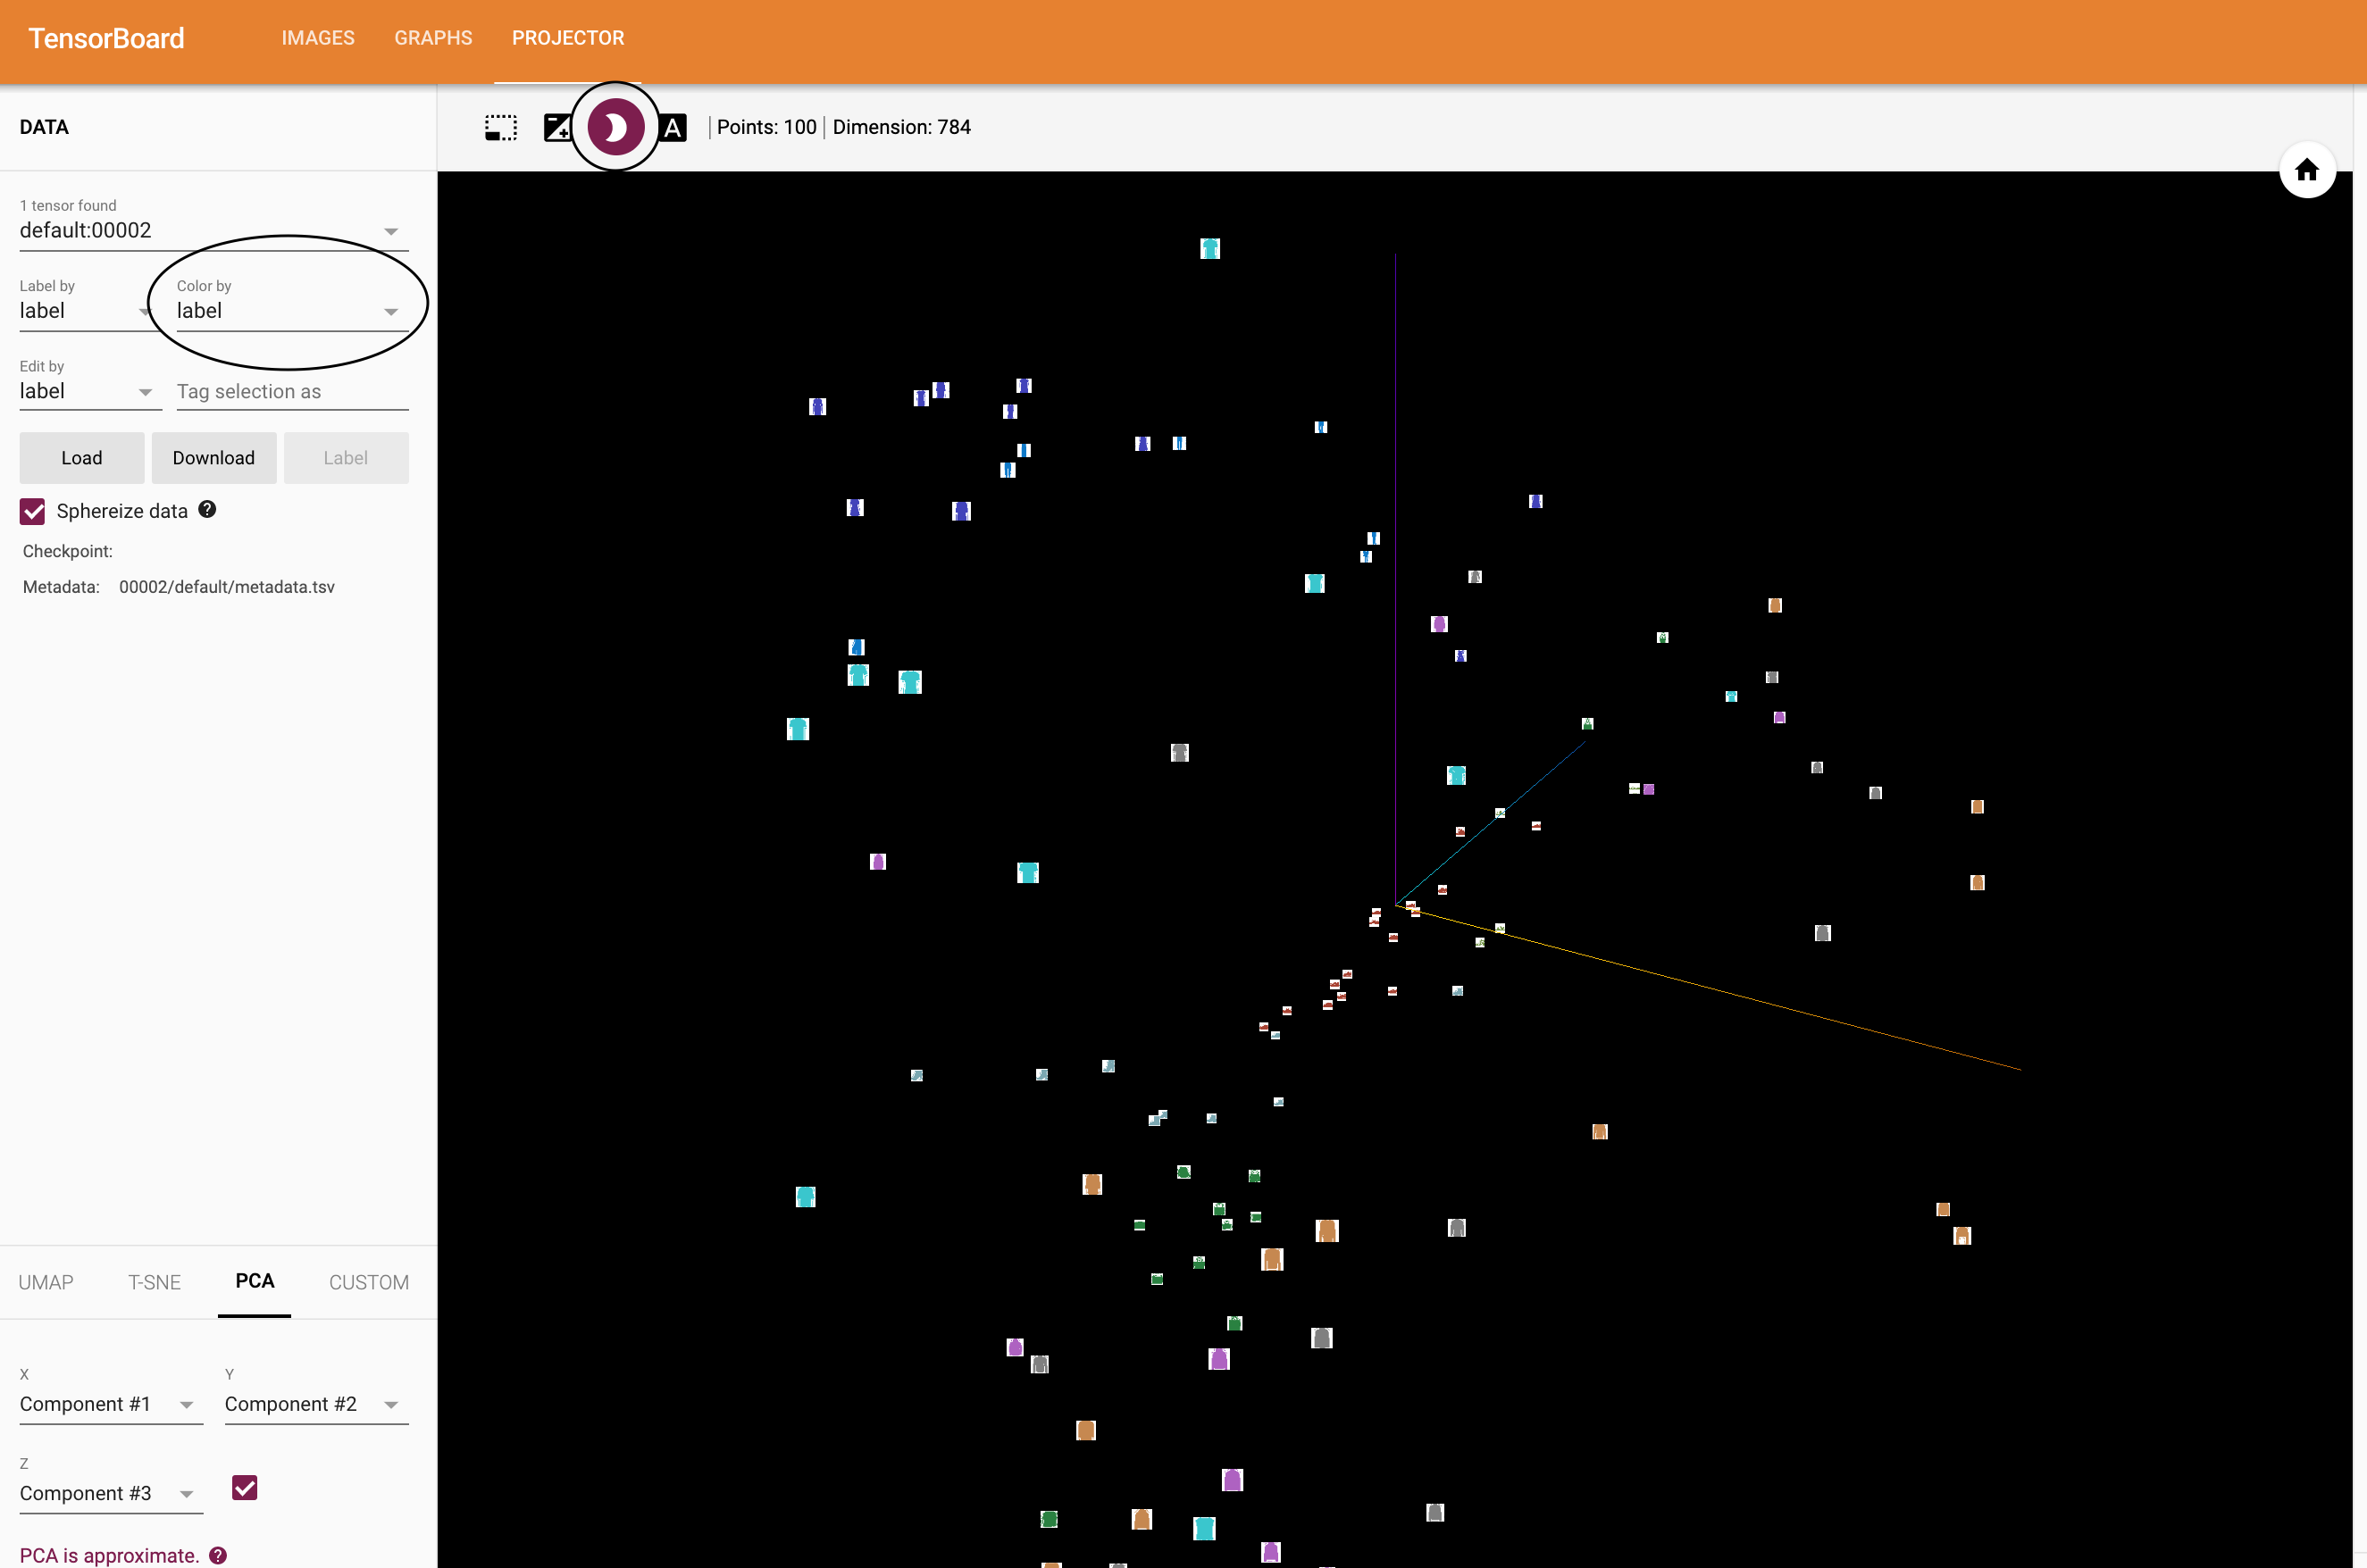    

现在，我们详细地考察我们的数据。让我们展示TensorBoard是怎么让训练和评估中的模型更明白，从训练开始。

## 5. Tracking model training with TensorBoard  

在之前的例子中，我们简单地在每2000轮打印了model的loss。现在，我们会把之前的loss加载到TensorBoard，单独用plot_classes_preds函数来看模型预测效果。


In [ ]:
# helper functions

def images_to_probs(net, images):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = net(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]


def plot_classes_preds(net, images, labels):
    '''
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_probs" function.
    '''
    preds, probs = images_to_probs(net, images)
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig

最后，让我们用前一份tutorial相同的来训练模型，但是把每1000个batch的结果写进TensorBoard，而不是在窗口打印出来。这个是使用add_scalar函数来完成的。

除此以外，在我们训练的时候，我们将在那个batch的4个图像中生成图像展示模型的预测 vs 真实结果。


In [ ]:
running_loss = 0.0
for epoch in range(1):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # every 1000 mini-batches...

            # ...log the running loss
            writer.add_scalar('training loss',
                            running_loss / 1000,
                            epoch * len(trainloader) + i)

            # ...log a Matplotlib Figure showing the model's predictions on a
            # random mini-batch
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(net, inputs, labels),
                            global_step=epoch * len(trainloader) + i)
            running_loss = 0.0
print('Finished Training')

你现在可以通过scalars tab来看到每15000次循环的loss：

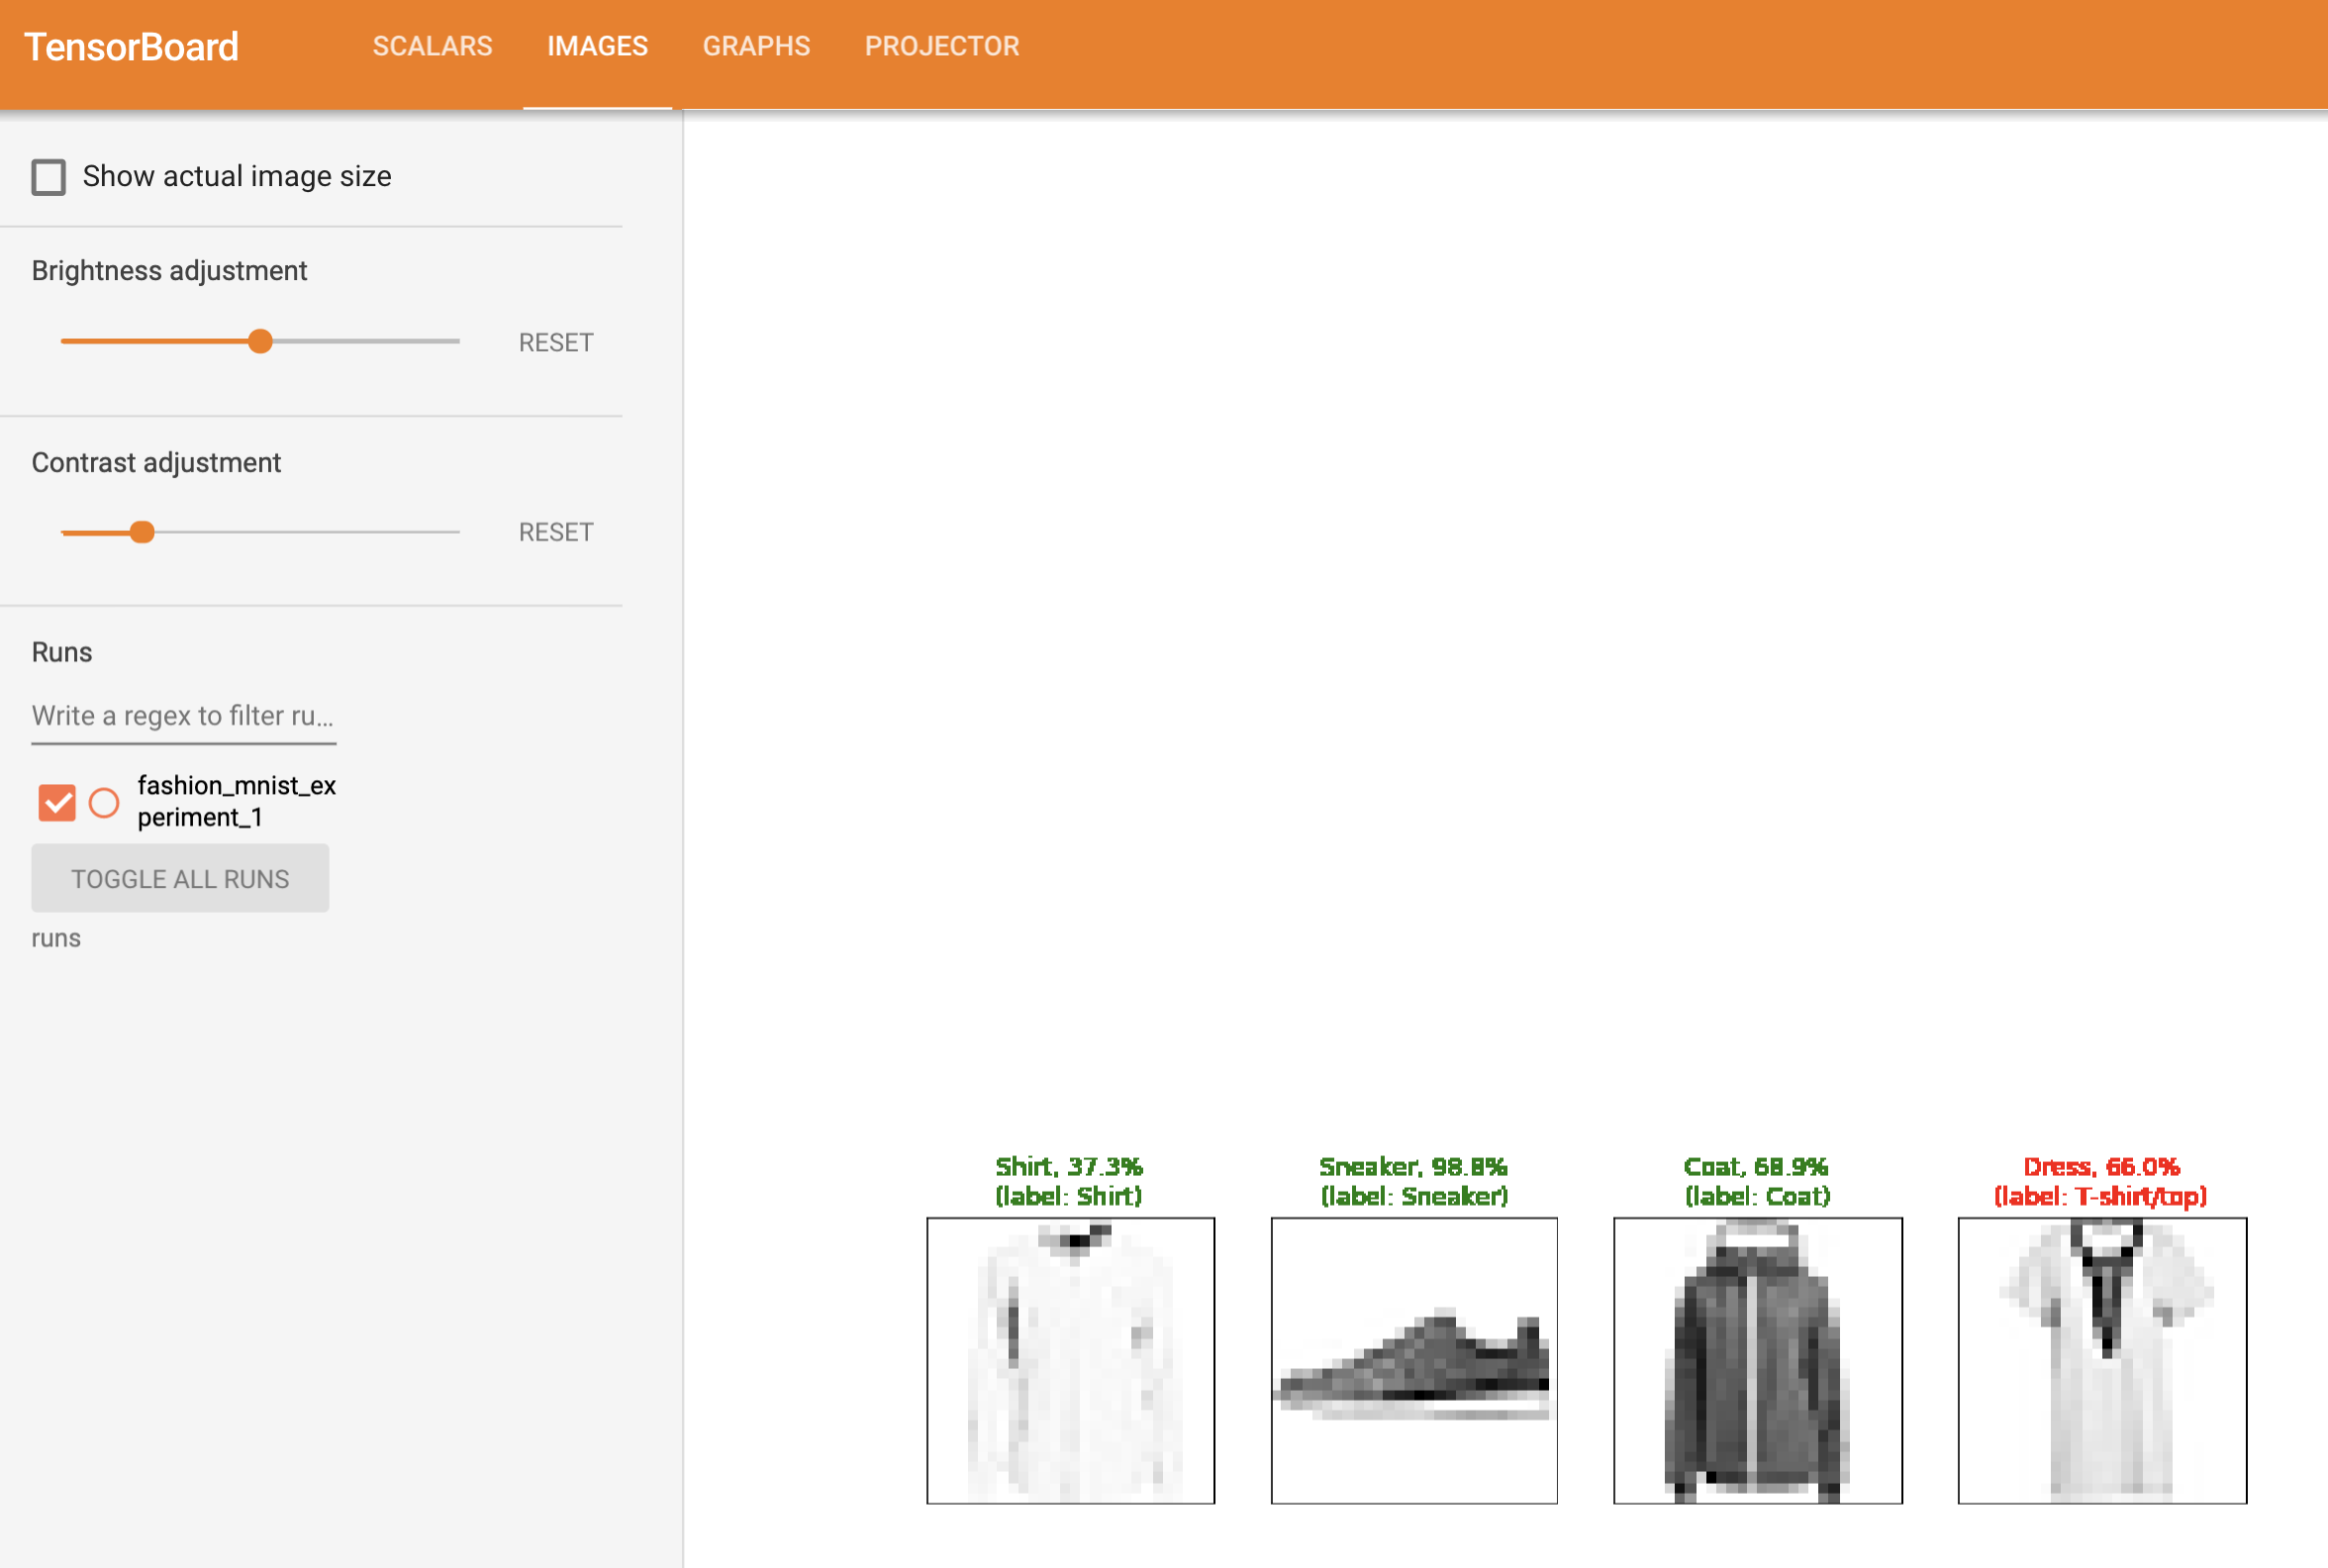  

此外，我们可以看到在整个学习期间的随机batch的模型预测。看到“Images” tab 以及向下运转的“预测 vs 实际”的可视化；这样为我们展示了，例如，在只是3000次训练循环后，模型已经足够区分分类间微小的区别例如衬衫，毛衣，外套，虽然还不够之后的训练那样确定：

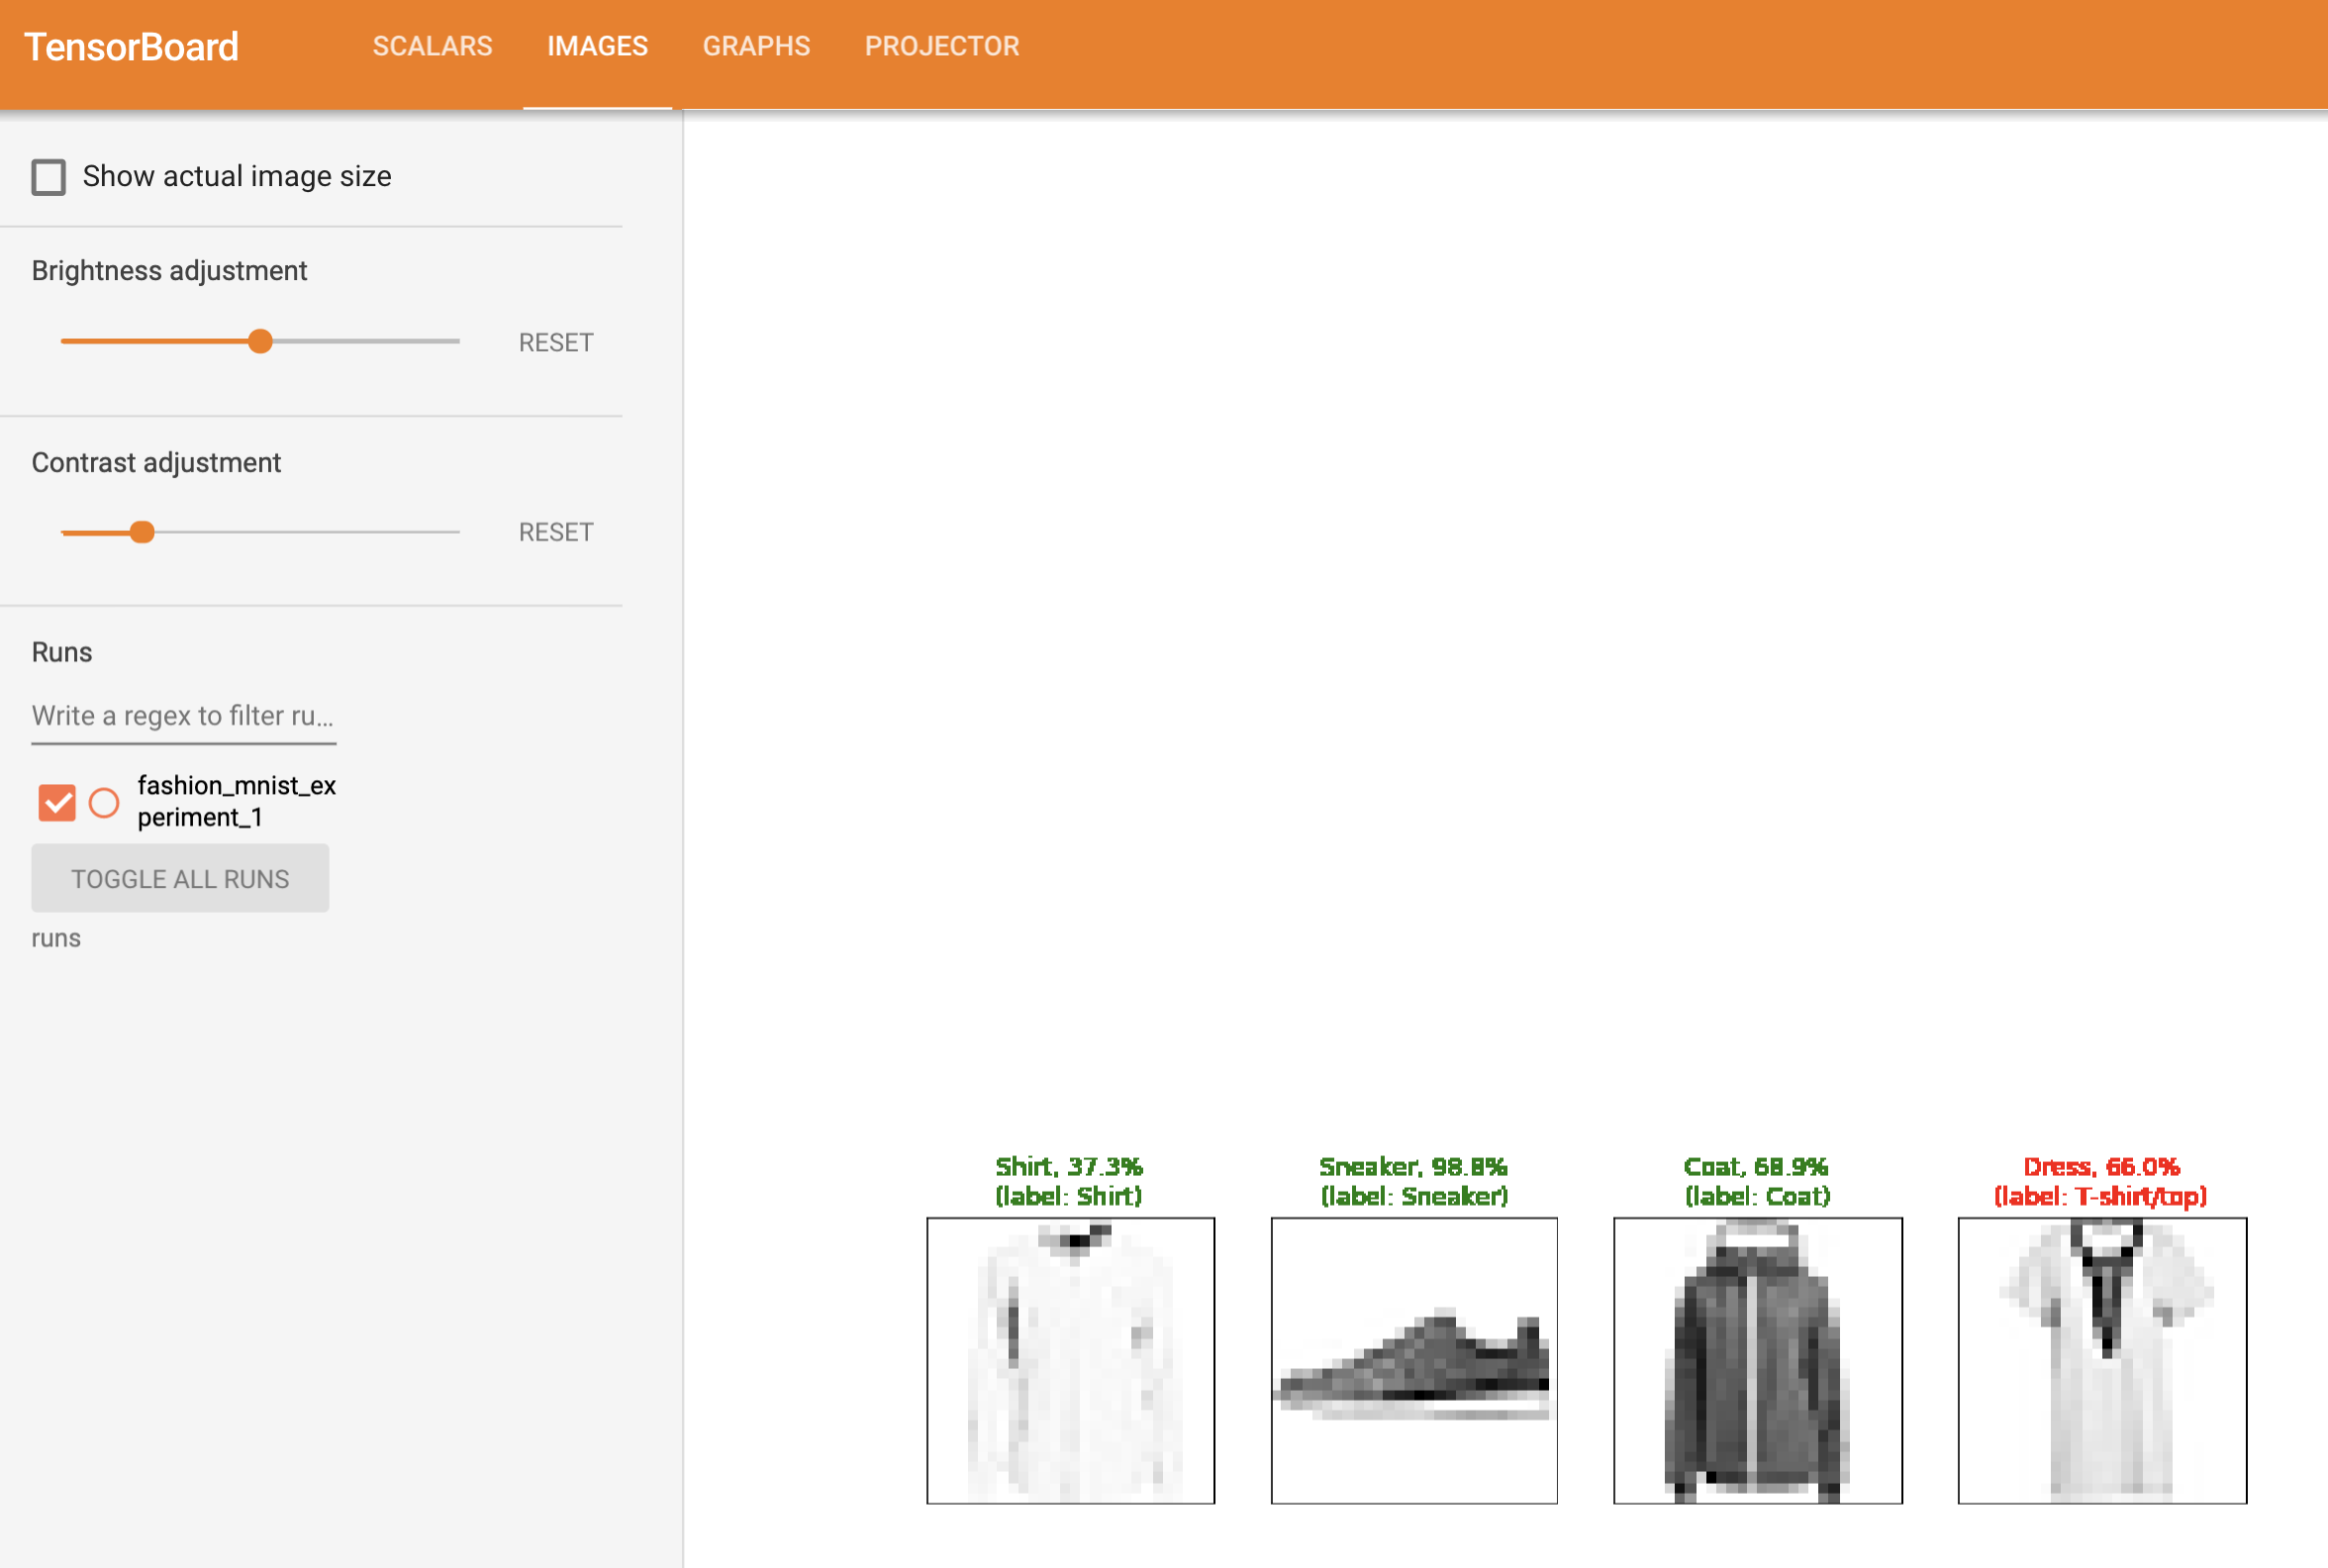  

在之前的tutorial里面，我们看到模型被训练好后的每一个分类准确度，这里，我们会使用TensorBoard来得到每一个分类的precision-recall。

## 6. Assessing trained models with TensorBoard

In [ ]:
# 1. gets the probability predictions in a test_size x num_classes Tensor
# 2. gets the preds in a test_size Tensor
# takes ~10 seconds to run
class_probs = []
class_preds = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        output = net(images)
        class_probs_batch = [F.softmax(el, dim=0) for el in output]
        _, class_preds_batch = torch.max(output, 1)

        class_probs.append(class_probs_batch)
        class_preds.append(class_preds_batch)

test_probs = torch.cat([torch.stack(batch) for batch in class_probs])
test_preds = torch.cat(class_preds)

# helper function
def add_pr_curve_tensorboard(class_index, test_probs, test_preds, global_step=0):
    '''
    Takes in a "class_index" from 0 to 9 and plots the corresponding
    precision-recall curve
    '''
    tensorboard_preds = test_preds == class_index
    tensorboard_probs = test_probs[:, class_index]

    writer.add_pr_curve(classes[class_index],
                        tensorboard_preds,
                        tensorboard_probs,
                        global_step=global_step)
    writer.close()

# plot all the pr curves
for i in range(len(classes)):
    add_pr_curve_tensorboard(i, test_probs, test_preds)

你现在可以看到“PR Curves” tab 里面包含了precision-recall每一个分类的曲线。仔细看，你会看到在某些分类中，模型会有接近100%的“area under the curve”，然后而其他区域却很低：

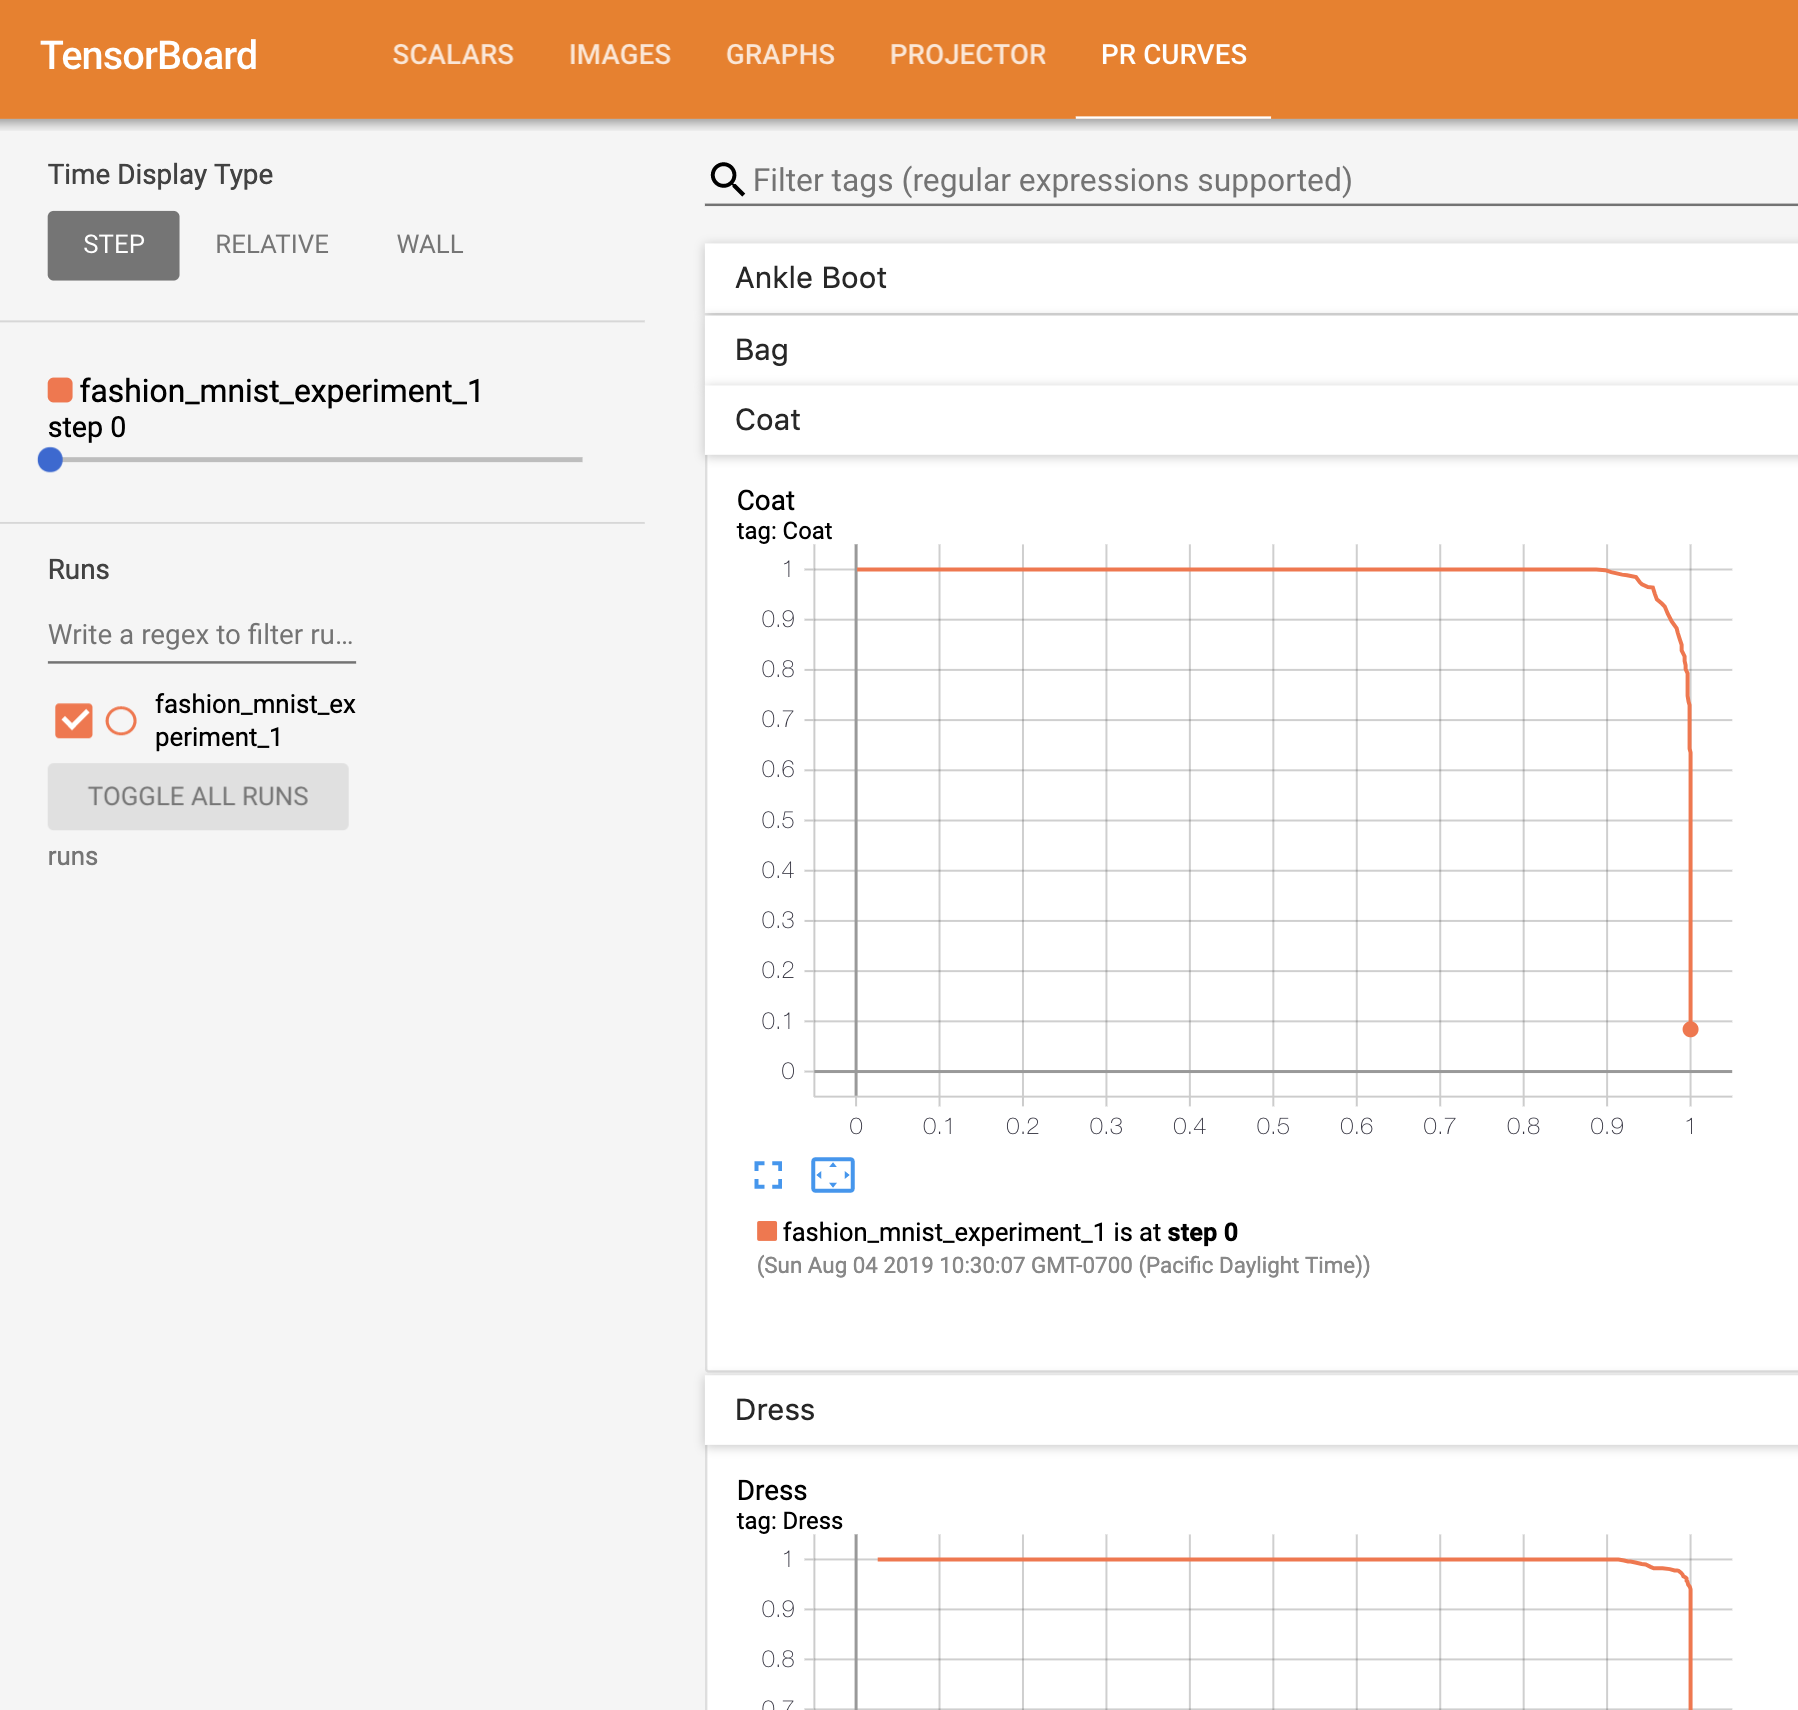  

这里没有TensorBoard和PyTorch结合的介绍。当然，你可以在你的Jupyter Notebook做各种TensorBoard的操作，然是对于TensorBoard来说，你可以得到默认的交互的可视化。